Beispiel für die Anwendung des `mpl_style` Paket
------

Mit dem Paket hat man folgende Möglichkeiten seinen `Plot style` zu definieren:
* plt_style: Einstellung der Formatierungen; default: ('default')
* color_style: Eigene Farben festlegen; default: ('default')
* color_order_style: Eigene Farben in eine gewünschte Reihenfolge sortieren; default: ('default')
* enable_color_order: Auswahl der Reihnenfolge ein oder ausschalten; default: (False)

### Wichtig!

Das Beispiel funktioniert nur wenn das Package im Python-Pfad enthalten ist.


* [keep always on the Python search path](http://stackoverflow.com/q/17806673/2375855) so you can include them like installed site-packages

### [Built-in magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html?highlight=magic)

* Magic commands sind IPython spezifisch
* Sie beginnen mit einem % und bieten viele nützliche Funktionen

In [1]:
%matplotlib inline
%autosave 3

Autosaving every 3 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#### Klasse `mpl_style` importieren

* beim initialisieren wird automatisch der default Style eingestellt

In [3]:
from mpl_style.style_ewk import PLTewk
ewk_plt = PLTewk()

Doku für den Befehl `set_style` anschauen:

In [4]:
ewk_plt.set_style?

Daten mit Pandas einlesen

In [5]:
ghd_bs = pd.read_excel('ghd_bs.xlsx')
ghd_bs = ghd_bs.set_index('jahr')

In [6]:
ghd_bs.head(6)

,Steinkohle,Braunkohle,Öl,Gas,Strom,Fernwärme,Erneuerbare Energien
jahr,,,,,,,
2011,15,2,302,390,507,86,44
2020,4,0,167,269,458,78,127
2025,2,0,127,213,438,70,153
2030,1,0,99,166,421,62,172
2040,0,0,65,102,395,48,197
2050,0,0,46,66,383,39,219


In [7]:
ghd_bs.Gas.describe()

count      6.000000
mean     201.000000
std      118.101651
min       66.000000
25%      118.000000
50%      189.500000
75%      255.000000
max      390.000000
Name: Gas, dtype: float64

Plot Style `enfo` auswählen:

In [8]:
ewk_plt.set_all_style(style='enfo')

# Farben vom Style 'enfo' laden
colors = ewk_plt.get_colors()

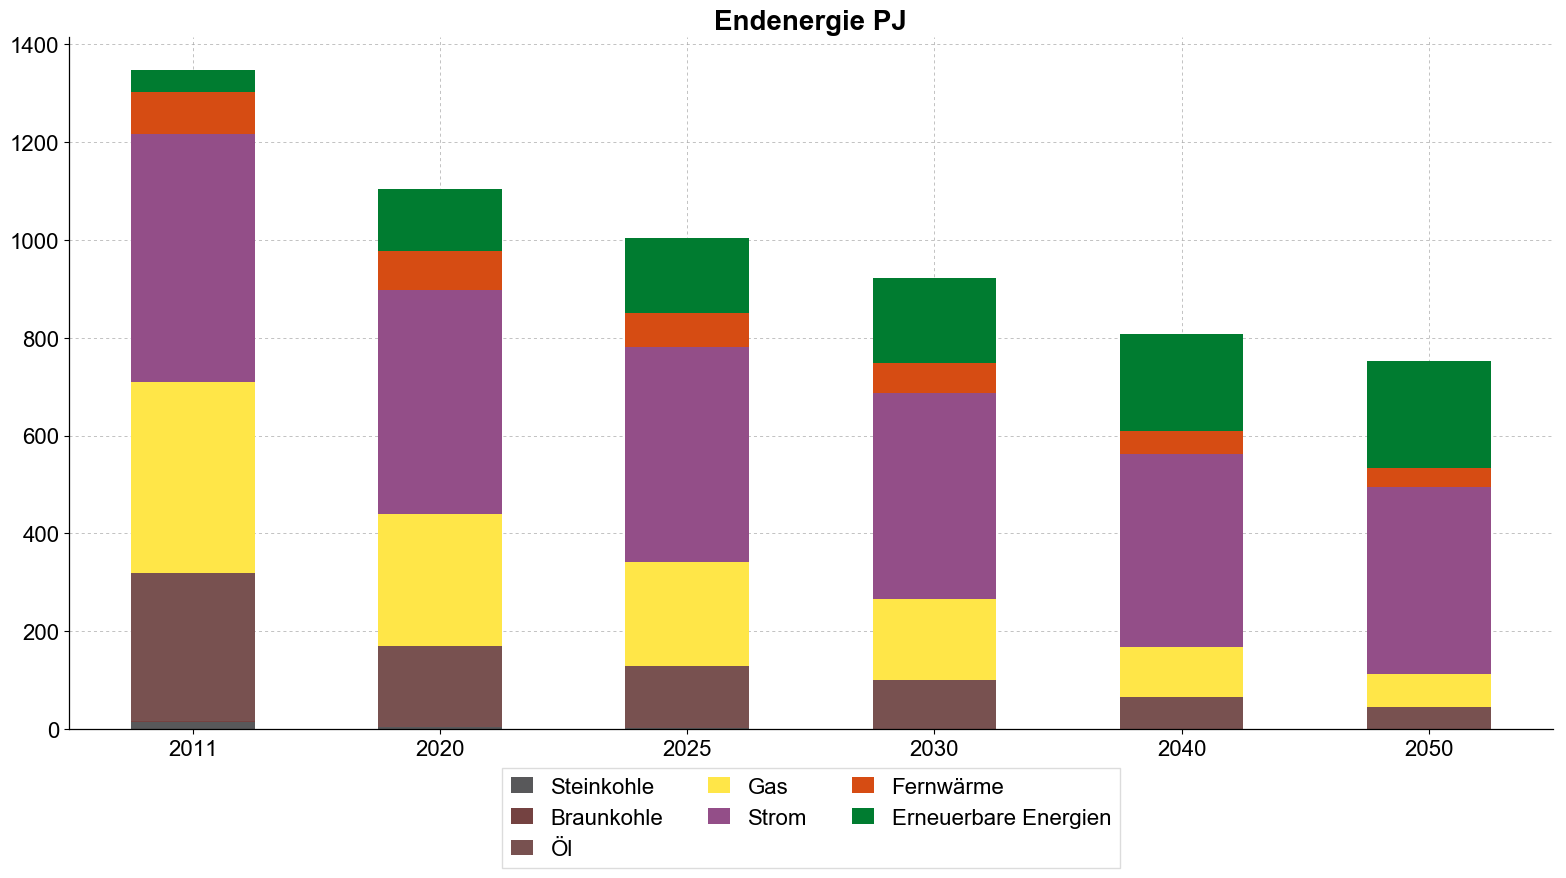

In [9]:
gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[1, 0.1])
fig = plt.figure(figsize=[16, 9])
ax = fig.add_subplot(gs[0])

color = [colors[i] for i in ghd_bs.columns]
ghd_bs.plot.bar(ax=ax, stacked=True, width=0.5, edgecolor=None,
            zorder=2, rot=0, legend=False, color=color)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', ncol=3,
          bbox_to_anchor=(0.5, -0.04))

ax.set_xlabel('').set_visible(False)
ax.set_title('Endenergie PJ', fontsize=20, fontweight='bold')
fig.tight_layout()

In [10]:
%whos

Variable   Type           Data/Info
-----------------------------------
PLTewk     type           <class 'mpl_style.style_ewk.PLTewk'>
ax         AxesSubplot    Axes(0.0538889,0.169888;0.927049x0.768631)
color      list           n=7
colors     dict           n=8
ewk_plt    PLTewk         <mpl_style.style_ewk.PLTe<...>ct at 0x000000000AF657B8>
fig        Figure         Figure(1600x900)
ghd_bs     DataFrame            Steinkohle  Braunko<...> 39                   219
gs         GridSpec       <matplotlib.gridspec.Grid<...>ct at 0x000000000B8230F0>
handles    list           n=7
labels     list           n=7


In [11]:
%magic